
# <h1 style=' border:2; border-radius: 10px; font-size:220%; font-weight: bold; color:black'><center>5312 Project</center></h1> 

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 border:0; border-radius: 10px; color:black'><center> TABLE OF CONTENTS </center></h1>

### [**3.1 Read data from txt file**](#title-one)
    
### [**3.2 Pre-processing data and store new data into CSV file**](#title-two)

### [**3.3 Combining data from two sources**](#title-three)

### [**3.4 Exploratory data analysis**](#title-four)
                                               
### [**3.5 Partitioning data and predicting housing prices**](#title-five) 

### [**3.5.2 Predictive Model Buliding**](#title-3.5.2) 
    
### [**1. Linear Regression**](#title-3.5.2.1)

### [**2. Decision Tree**](#title-3.5.2.2)
                                               
### [**3. Ensemble**](#title-3.5.2.3)


<a id="title-one"></a>
## **<span>3.1 Read data from txt file  </span>**

### 1. Please write code to read data stored in the file named cadata.txt. 

In [1]:
f = open("cadata.txt","r")

### 2. Please delete the brief introduction content at the first several lines of the file and only keep those data for the variables.

In [2]:
data_lst=[]
for row in f:
    if row[0].isnumeric(): # Skip all introduction content
        data_lst.append(row)
f.close()

print(data_lst[0])

1	4.5260000000000000e+005	8.3252000000000006e+000	4.1000000000000000e+001	8.8000000000000000e+002	1.2900000000000000e+002	3.2200000000000000e+002	1.2600000000000000e+002	3.7880000000000003e+001 -1.2223000000000000e+002



#### Notice that the file mixes tab with space. We need to deal with it later.

In [3]:
f= open('cadata.txt','w')
for row in data_lst:
    f.write(row)
f.close()

### 3. Please store the remained data into a list with each row being an element.

In [4]:
f = open("cadata.txt","r")
cadata_lst=[]
for row in f:
    # Because this txt file mixes tab with space
    row = row.replace(' ', '\t') #  Replace all space with tab
    obs = row.split('\t')
    cadata_lst.append(obs)
f.close()


In [5]:
# So we use a list to store the data in cadata.txt
print(len(cadata_lst))
# There are 20640 elements in this list, each represents a row(observation)
print(cadata_lst[0])
print(len(cadata_lst[0]))
# Each element consists of 10 variables

20640
['1', '4.5260000000000000e+005', '8.3252000000000006e+000', '4.1000000000000000e+001', '8.8000000000000000e+002', '1.2900000000000000e+002', '3.2200000000000000e+002', '1.2600000000000000e+002', '3.7880000000000003e+001', '-1.2223000000000000e+002\n']
10


<a id="title-two"></a>
## **<span>3.2 Pre-processing data and store new data into CSV file  </span>**

### 1. In the file cadata.txt, for each line, variables are separated by Tabs. Now please replace Tabs with commas for each line. As a result, the data in each line will become comma-separated.

In [6]:
nf= open('newcadata.txt','w')
for obs in cadata_lst:
    newline = ','.join(obs)
    nf.writelines(newline)
nf.close()

### 2.  Please create a new CSV file named cadata.csv, with the first line being the names of these variables in the file cadata.csv. These variable names are separated by commas as all. For the names, please see the data description of the first file named cadata.txt.


#### From cadata.txt we know that 10 variables are in this order:
- block group id, median house value, median income, housing median age, total rooms, total bedrooms, population, households, latitude, and longitude 

In [7]:
ca_variables=['block_group_id','median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 
 'total_bedrooms', 'population', 'households', 'latitude', 'longitude'] 

In [8]:
import pandas as pd
# Set comma as separator
df1 = pd.read_csv("newcadata.txt", sep=",",header=None,names=ca_variables)

### 3. Please convert the data read from cadata.txt from the scientific notation to normal numbers or fractions with four decimals after the point. For example, the number in the scientific notation 3.2200000000000e+002 should be converted to 322.0000. 

In [9]:
pd.options.display.float_format = '{:.4f}'.format

df1.head(3)

,block_group_id,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,1,452600.0000,8.3252,41.0000,880.0000,129.0000,322.0000,126.0000,37.8800,-122.2300
1,2,358500.0000,8.3014,21.0000,7099.0000,1106.0000,2401.0000,1138.0000,37.8600,-122.2200
2,3,352100.0000,7.2574,52.0000,1467.0000,190.0000,496.0000,177.0000,37.8500,-122.2400


### 4. Please store these lines into file cadata.csv. The lines in the file cadata.csv should be corresponding to the lines in cadata.txt except for the brief introduction part.

In [10]:
df1.to_csv("cadata.csv",index = None)

<a id="title-three"></a>
## **<span>3.3 Combining data from two sources  </span>**

### 1. Please read data from both files named cadata.csv and ocean proximity.csv.

In [1]:
import pandas as pd
df1= pd.read_csv("cadata.csv")
df1.head(3)

,block_group_id,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,1,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,2,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,3,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24


In [2]:
df1.shape

(20640, 10)

In [3]:
df2= pd.read_csv("ocean_proximity.csv")
df2.head(3)

,block_group_id,ocean_proximity
0,1,NEAR BAY
1,2,NEAR BAY
2,3,NEAR BAY


In [4]:
df2.shape

(20640, 2)

### 2. Please combine the two datasets based on matching the variable block group ID. This means all variables with the same block group ID are combined together.


In [5]:
# Thus we merge data by the variable block_group_id
df3 = pd.merge(df1, df2, on="block_group_id")
df3.head(3)

,block_group_id,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,ocean_proximity
0,1,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,NEAR BAY
1,2,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,NEAR BAY
2,3,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,NEAR BAY


### 3. Please store the combined dataset into a new CSV file named data for analysis.csv. The first line of the new CSV file contains variable names. In each line, data or names are separated by commas.

In [6]:
df3.to_csv("data_for_analysis.csv",index = None)

<a id="title-four"></a>
## **<span>3.4 Exploratory data analysis   </span>**

### 1. For variables median house value, median income, and households, conduct the descriptive statistics. In detail, the mean, the variance, the mode, and the skew of those variables are calculated.

In [7]:
import pandas as pd
df = pd.read_csv("data_for_analysis.csv")
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   block_group_id      20640 non-null  int64  
 1   median_house_value  20640 non-null  float64
 2   median_income       20640 non-null  float64
 3   housing_median_age  20640 non-null  float64
 4   total_rooms         20640 non-null  float64
 5   total_bedrooms      20640 non-null  float64
 6   population          20640 non-null  float64
 7   households          20640 non-null  float64
 8   latitude            20640 non-null  float64
 9   longitude           20640 non-null  float64
 10  ocean_proximity     20640 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


,block_group_id,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,ocean_proximity
0,1,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,NEAR BAY
1,2,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,NEAR BAY
2,3,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,NEAR BAY


####  There are no NA values in the data frame.

In [8]:
df.shape # the dataframe has 20640 rows and 11 columns

(20640, 11)

In [9]:
# From the dataframe above we can see than only 'ocean_proximity' is nominal(non-numerical)
# Get the basic features of 'ocean_proximity'
ocean_status = df.groupby('ocean_proximity')['ocean_proximity'].agg('count').sort_values(ascending = False)
ocean_status

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- For median house value:

In [10]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [11]:
print(df['median_house_value'].mean())
print(df['median_house_value'].var())
print(df['median_house_value'].mode())
print(df['median_house_value'].skew())

206855.81690891474
13316148163.035124
0    500001.0
Name: median_house_value, dtype: float64
0.9777632739098341


#### Here we find that min median house value is 14999.000000 whereas the max is 500001.000000, with a wide variation of 13316148163.035124 in property values. We should remove outliers per location using mean and one standard deviation.

- For median income:

In [12]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [13]:
print(df['median_income'].mean())
print(df['median_income'].var())
print(df['median_income'].mode())
print(df['median_income'].skew())

3.8706710029070246
3.609322559976529
0     3.1250
1    15.0001
Name: median_income, dtype: float64
1.6466567021344465


- For households:

In [14]:
df['households'].describe()

count    20640.000000
mean       499.539680
std        382.329753
min          1.000000
25%        280.000000
50%        409.000000
75%        605.000000
max       6082.000000
Name: households, dtype: float64

In [15]:
print(df['households'].mean())
print(df['households'].var())
print(df['households'].mode())
print(df['households'].skew())

499.5396802325581
146176.03990027992
0    306.0
Name: households, dtype: float64
3.410437711667147


### 2. For the three variables housing median age, total rooms, and population, please draw a histogram for each variable. These histograms are to show how the values distribute among their value intervals. 

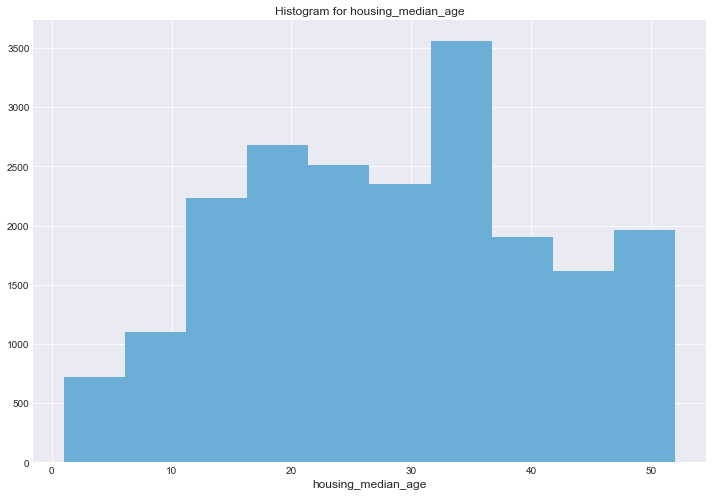

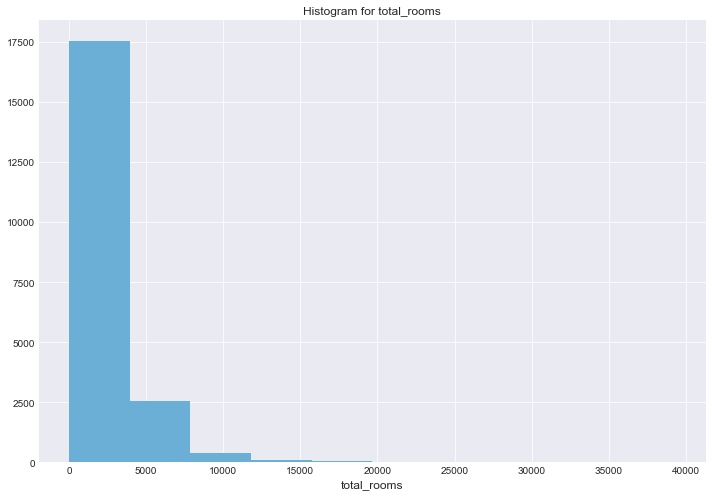

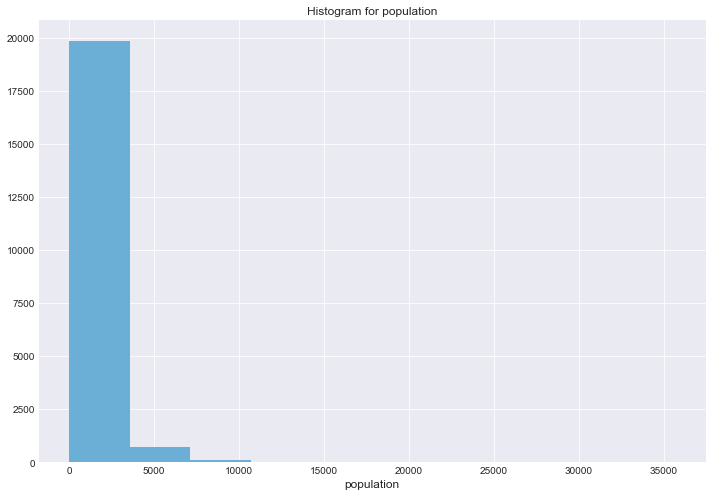

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

variables_names = ['housing_median_age','total_rooms','population']
palette = plt.get_cmap('tab20c')#'Pastel2')

for variable_name in variables_names:
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(10,7))
    plt.hist(df[variable_name],color = palette.colors[1])
    plt.title(f'Histogram for {variable_name}')
    plt.xlabel(variable_name, size=12)
    plt.tight_layout()

#### The histograms show that housing_median_age follows an approximately normal distribution while total rooms and populations are not.

### 3. Please draw scatterplots to preliminarily explore the relationship between variables and median house value. Specifically, you should draw these scatterplots:

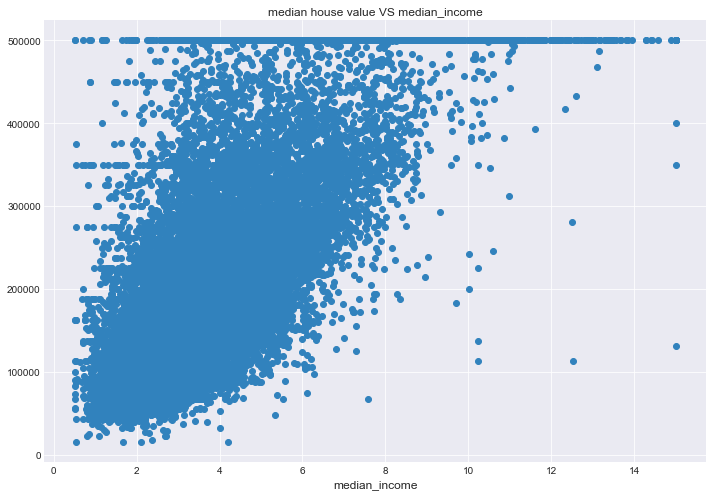

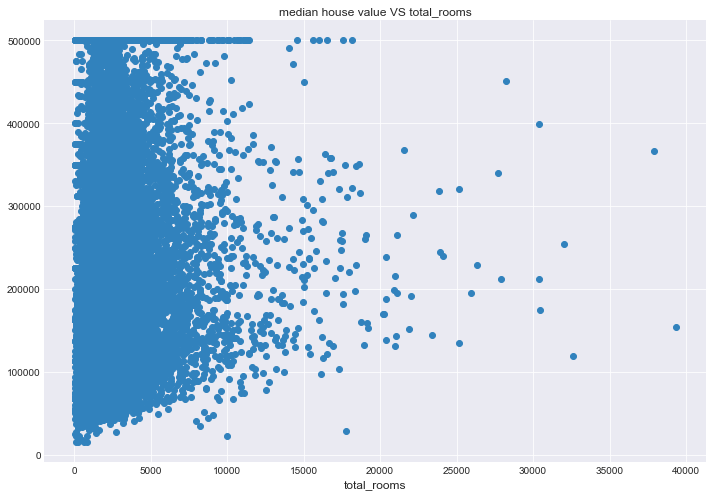

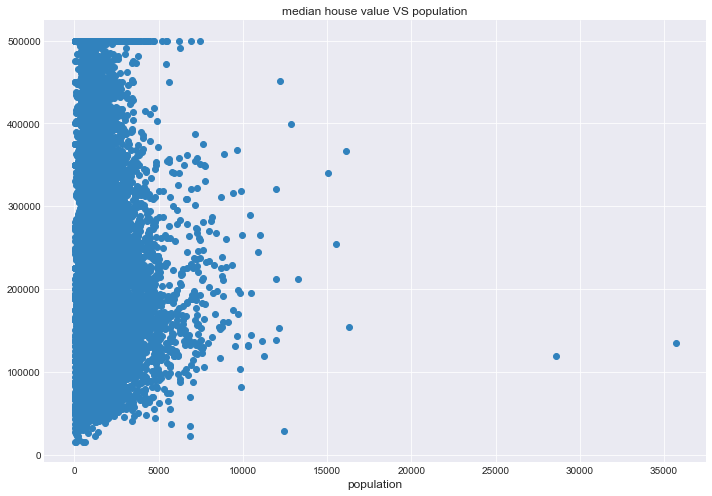

In [17]:
feature_names = ['median_income','total_rooms','population']
palette = plt.get_cmap('tab20c')#'Pastel2')

for index, feature_name in enumerate(feature_names):
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(10, 7))
    plt.scatter(df[feature_name], df['median_house_value'],color = palette.colors[0])
    plt.xlabel(feature_name, size=12)
    plt.title(f'median house value VS {feature_name}')
    plt.tight_layout()

#### The scatterplots show that median house value positively correlates with median income but has no apparent relationship with total rooms and population. The scatterplots also indicate some extreme values(outliers), which need to be wrangled.

### 4. The above results should be shown in table in pretty print style.

<a id="title-five"></a>
## **3.5 <span>Partitioning data and predicting housing prices  </span>**

### 1. Partitioning data set into train data set and test data set. To be objective, systematic sampling should be used when partitioning data. The train data set should be about 80% of all data points and the test data set should be 20% of them. 

#### For data analysis, we should perform some data cleaning and feature engineering before partitioning data 

#### Remove Outliers in housing prices

In [18]:
import numpy as np
def remove_mhv_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('ocean_proximity'):
        m = np.mean(subdf.median_house_value)
        st = np.std(subdf.median_house_value)
        reduced_df = subdf[(subdf.median_house_value>(m-st)) & (subdf.median_house_value<=(m+st))]
        # Using mean and one standard deviation(95% Confidence Interval)
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df_ = remove_mhv_outliers(df)
df_.shape

(15400, 11)

#### For data analysis, we should perform one-hot encoding for feature engineering.

In [19]:
df_.head(3)

,block_group_id,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,ocean_proximity
0,831,217000.0,4.6458,9.0,3666.0,711.0,2341.0,703.0,37.61,-121.99,<1H OCEAN
1,860,247600.0,4.6146,21.0,4342.0,783.0,2172.0,789.0,37.57,-121.97,<1H OCEAN
2,861,283500.0,5.7192,15.0,3575.0,597.0,1777.0,559.0,37.58,-121.96,<1H OCEAN


In [20]:
# To construct a predictive model, we should convert 'ocean_proximity' to dummy variables
dummies = pd.get_dummies(df_.ocean_proximity)
dummies.head(3)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0


In [21]:
# From the dataframe above we can see than only 'ocean_proximity' is nominal(non-numerical)
# Get the basic features of 'ocean_proximity'
ocean_status = df_.groupby('ocean_proximity')['ocean_proximity'].agg('count').sort_values(ascending = False)
ocean_status

ocean_proximity
<1H OCEAN     6690
INLAND        5411
NEAR OCEAN    1779
NEAR BAY      1517
ISLAND           3
Name: ocean_proximity, dtype: int64

In [22]:
# We drop ISLAND in ocean proximity to avoid the dummy variable trap
new_df = pd.concat([df_,dummies.drop('ISLAND',axis='columns')],axis='columns')
# ocean_proximity and block_group_id are meaningless in building the predictive model, drop them
new_df = new_df.drop(['ocean_proximity','block_group_id'],axis='columns')
new_df.head(3)

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,217000.0,4.6458,9.0,3666.0,711.0,2341.0,703.0,37.61,-121.99,1,0,0,0
1,247600.0,4.6146,21.0,4342.0,783.0,2172.0,789.0,37.57,-121.97,1,0,0,0
2,283500.0,5.7192,15.0,3575.0,597.0,1777.0,559.0,37.58,-121.96,1,0,0,0


#### Now we can partition the data set into train data set and test data set by systematic sampling.

In [23]:
# So we select 1 out of 5 observations as test data; the rest is the training data
import numpy as np
import pandas as pd
import random

random.seed(0)
start_index= random.randint(0,5)
indexes = np.arange(start_index, len(df_), step=5)

test = new_df.iloc[indexes]
train = new_df.drop(df_.index[indexes])

<a id="title-3.5.2"></a>
### **2. <span>Students should program to predict the median house value based on other variables in the file data for analysis.csv. Please construct the prediction model as a function/functions and call the function(s) when make prediction. The prediction model can be linear regression, logistic regression or any other feasible one. The students are required to utilize at lease one self-constructed model for prediction.  </span>**


  

In [24]:
y_train = train['median_house_value'] # median house value is our prediction target
X_train = train.drop(['median_house_value'],axis=1)

y_test = test['median_house_value'] # prediction target
X_test = test.drop(['median_house_value'],axis=1)

In [25]:
X_train.head(3)

,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,4.6458,9.0,3666.0,711.0,2341.0,703.0,37.61,-121.99,1,0,0,0
1,4.6146,21.0,4342.0,783.0,2172.0,789.0,37.57,-121.97,1,0,0,0
2,5.7192,15.0,3575.0,597.0,1777.0,559.0,37.58,-121.96,1,0,0,0


<a id="title-3.5.2.1"></a>
### **<span style="color:#CD5C5C;">1. Linear Regression </span>**

In [26]:
from sklearn.linear_model import LinearRegression

np.random.seed(1)
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
y_predTrain_1 = lr_clf.predict(X_train)
y_predTest_1 = lr_clf.predict(X_test)
lr_clf.score(X_test, y_test)

0.6747352271685387

#### The score is relatively low, so we construct another model to predict the median house value.

<a id="title-3.5.2.2"></a>
### **<span style="color:#CD5C5C;">2. Decision Tree </span>**

In [27]:
from sklearn.tree import DecisionTreeRegressor

dt_clf = DecisionTreeRegressor(random_state=0)
dt_clf.fit(X_train, y_train)
y_predTrain_2 = dt_clf.predict(X_train)
y_predTest_2 = dt_clf.predict(X_test)
dt_clf.score(X_test, y_test)

0.669459470529002

####  Decision Tree is still not good enough.

<a id="title-3.5.2.3"></a>
### **<span style="color:#CD5C5C;">3. Ensemble </span>**

In [28]:
from sklearn import ensemble
en_clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 6, min_samples_split = 3,
          learning_rate = 0.1, loss = 'squared_error')
en_clf.fit(X_train, y_train)
y_predTrain_3 = en_clf.predict(X_train)
y_predTest_3 = en_clf.predict(X_test)
en_clf.score(X_test,y_test)

0.8435802806790624

#### This time the performance is much better!

#### Based on above results we can say that Ensemble gives the best score. Hence we will use that.

### 3. Evaluating the prediction results. The student should compare the prediction value and the real value, and then calculate the mean squared error (MSE) of the prediction.

Here is the formula of MSE:
- $$MSE =\frac{1}{m}\sum^{m}_{i =1}{(f(x_i)-y_i)^2},$$
where m is the number of cases in the test set, f(xi) is the predicted value of case i in the test set, and yi is the real value of median house value of case i in the test case. 

In [35]:
import numpy as np
np.square(y_predTest_3-y_test).mean()

884000831.9631711

In [36]:
list(y_test)[0]

216900.0

In [37]:
y_predTest_3[0]

241643.46030518046